To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - KNN hyperparameter tuning using cross validation

## 2.1

In [6]:
# your code starts here
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 301/as13381_hw1/Social_Network_Ads.csv')

X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac = accuracy_score(y_test,y_pred)
misc_err = 1 - ac
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Misclassification error: {}'.format(round(misc_err, 4)))
print('Accuracy: {}'.format(round(ac, 4)))
print('Precision: {}'.format(round(prec, 4)))
print('Recall: {}'.format(round(rec, 4)))
print('F-1 score: {}'.format(round(f1, 4)))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Misclassification error: 0.05
Accuracy: 0.95
Precision: 0.9091
Recall: 0.9091
F-1 score: 0.9091


**Answer:**

## 2.2 and 2.3

Optimal k for p = 1: 10
Optimal k for p = 2: 10


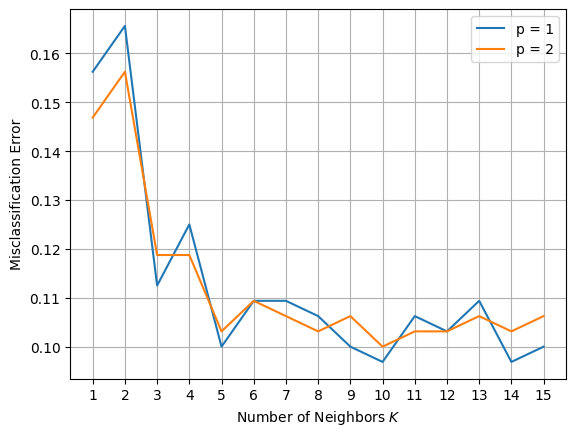

In [7]:
# your code starts here
from sklearn.model_selection import cross_val_score

#hyper parameter tuning.Selecting best K
neighbors = list(range(1, 16))
# empty list that will hold cv scores
cv_scores_1 = []
cv_scores_2 = []
for k in neighbors:
    knn_1 = KNeighborsClassifier(n_neighbors=k, p = 1)
    scores_1 = cross_val_score(knn_1, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_1.append(scores_1.mean())#graphical view

    knn_2 = KNeighborsClassifier(n_neighbors=k, p = 2)
    scores_2 = cross_val_score(knn_2, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_2.append(scores_2.mean())#graphical view

#misclassification error
MSE_1 = [1-x for x in cv_scores_1]
MSE_2 = [1-x for x in cv_scores_2]

#optimal K
optimal_k_index_1 = MSE_1.index(min(MSE_1))
optimal_k_1 = neighbors[optimal_k_index_1]

optimal_k_index_2 = MSE_2.index(min(MSE_2))
optimal_k_2 = neighbors[optimal_k_index_2]

print('Optimal k for p = 1: {}'.format(optimal_k_1))# plot misclassification error vs k
print('Optimal k for p = 2: {}'.format(optimal_k_2))# plot misclassification error vs k
plt.plot(neighbors, MSE_1, label='p = 1')
plt.plot(neighbors, MSE_2, label='p = 2')
plt.xticks(range(1, 16))
plt.xlabel('Number of Neighbors $K$')
plt.ylabel('Misclassification Error')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

**Answer:**

## 2.4

**Answer:**
The best $K$ for both Euclidean distance and Manhattan distance is $K=10$. The best combination is with $p = 1$.